 # MPA-MLF, Lab 7 - Convolutional Neural Network

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [70]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [71]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### 1.2 Dataset examination

Using the following code, display random images,

In [72]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

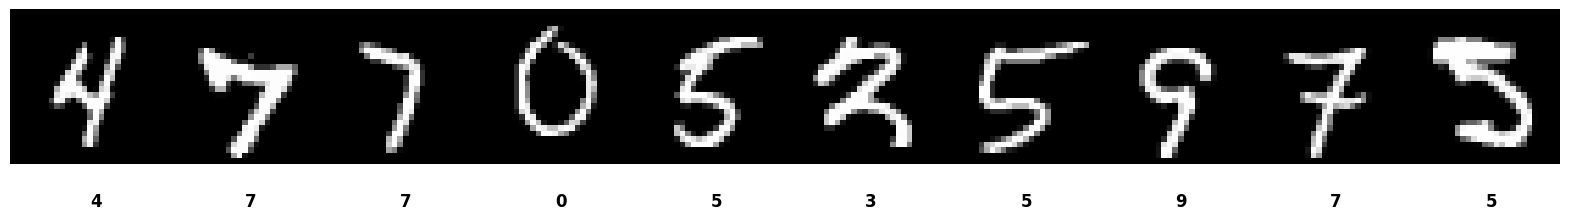

(60000, 28, 28)
(10000, 28, 28)


'\nthe dataset has images of numbers from 0 to 9\nwe have 60,000 images in the training dataset and 10,000 in the test dataset\nthe images are grayscale so we only have 1 channel\nthe size of the input images is 28 x 28 pixels\nthe pixels values range from 0 to 255, we need to scale these value to range from 0 to 1, we can do this by dividing by 255. \nwe will hot encode the labels y_train\n'

In [73]:
display_random_images(X_train, y_train)


print(X_train.shape)
print(X_test.shape)

'''
the dataset has images of numbers from 0 to 9
we have 60,000 images in the training dataset and 10,000 in the test dataset
the images are grayscale so we only have 1 channel
the size of the input images is 28 x 28 pixels
the pixels values range from 0 to 255, we need to scale these value to range from 0 to 1, we can do this by dividing by 255.
we will hot encode the labels y_train
'''



Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?
the dataset has images of numbers from 0 to 9

- How many data samples do we have in train and test datasets?
we have 60,000 images in the training dataset and 10,000 in the test dataset

- How many colour channels does the input variable have?
the images are grayscale so we only have 1 channel

- What is the size of the input images?
the size of the input images is 28 x 28 pixels

- What is the necessary preprocessing of the input data X? the pixels values range from 0 to 255, we need to scale these value to range from 0 to 1, we can do this by dividing by 255.

- How many classes do we have in target varoable? There are 10 classes, one for each digit 0 through 9.


- What is the necessary preprocessing of target variable y? we will hot encode the labels y_train


#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [74]:
X_train_scaled = X_train.astype(np.float32) / 255
y_train_encoded = to_categorical(y_train, num_classes=10)


### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [75]:
model = Sequential([
    Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])




#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [76]:

loss = 'categorical_crossentropy'
optimizer = Adam
metrics = ['accuracy']
learning_rate = 0.001


model.compile(loss=loss,
              optimizer=optimizer(learning_rate=learning_rate),
              metrics=metrics)

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 9216)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                92170     
                                                                 
Total params: 93834 (366.54 KB)
Trainable params: 93834 (366.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [77]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=128, validation_split = 0.2)


Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.2898 - accuracy: 0.9186 - val_loss: 0.1140 - val_accuracy: 0.9688
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0888 - accuracy: 0.9743 - val_loss: 0.0807 - val_accuracy: 0.9752
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0625 - accuracy: 0.9820 - val_loss: 0.0593 - val_accuracy: 0.9823
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0490 - accuracy: 0.9852 - val_loss: 0.0568 - val_accuracy: 0.9828
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0415 - accuracy: 0.9879 - val_loss: 0.0537 - val_accuracy: 0.9846
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0355 - accuracy: 0.9895 - val_loss: 0.0554 - val_accuracy: 0.9840
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0308 - accuracy: 0.9906 - val_loss: 0.0536 - val_accuracy: 0.9842
Epoch 

#### 3.1 Model Evaluation on validation data

# Plot the development of the training and validation loss, and training and validation metrics.

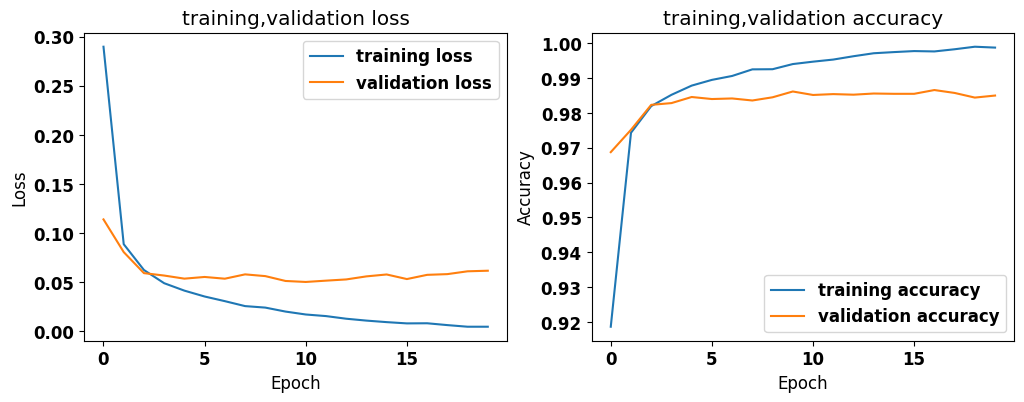

In [78]:

X_test = X_test.astype('float32') / 255.0
y_test_encoded = to_categorical(y_test, num_classes=10)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('training,validation loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('training,validation accuracy')

plt.show()

### 4. Model evaluation

*Evaluate* the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

In [79]:



y_pred = model.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test_labels, y_pred_labels)
print("Classification Report:")
print(report)

313/313 [==============================] - 1s 4ms/step
Accuracy: 0.9881
Confusion Matrix:
[[ 972    0    1    0    0    1    1    1    4    0]
 [   0 1132    0    1    0    0    0    1    1    0]
 [   2    3 1009    2    2    0    1    6    7    0]
 [   0    0    2 1000    0    4    0    0    3    1]
 [   0    0    0    0  978    0    0    0    1    3]
 [   2    0    0    7    0  881    1    1    0    0]
 [   6    2    0    0    6    4  936    0    4    0]
 [   0    1    5    1    0    0    0 1020    1    0]
 [   3    0    1    1    0    0    0    2  966    1]
 [   1    1    0    2   10    4    0    4    0  987]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.

### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it